<a href="https://colab.research.google.com/github/anuj561/Airbnb_NYC_2019/blob/main/Airbnb_NYC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AirBnb Exploratory Data Analysis (EDA) New York 2019**

Hi, 

This is an EDA project on Airbnb NYC data from 2019. The data is publicly provided by Airbnb on Creative Common License. 

We will explore and visualize the dataset from Airbnb in New York using basic exploratory data analysis techniques. We will be finding out the distribution of every Airbnb listing based on their location, including their price range, room type, listing name, and other related factors.

So, let's get started.

This Project has 4 phase :
1. Loading and Understanding Data
2. Cleaning Dataset
3. Exploring and Data Visualization
4. Conclusion

# 1. Loading and Understanding Data

## 1.1 Importing Libraries
* **Pandas** and **Numpy** for Data Analysis
* **Matplotlib, Seaborn and Plotly** for Data Visualizations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
sns.set(rc={'figure.figsize':(18,9)},style="darkgrid", color_codes=True)

## 1.2 Importing Dataset

To load the dataset, we use pandas library and function read_csv() to read the CSV file of New York Airbnb 2019–2020 dataset which is located in the same location as this colab notebook.

In [2]:
airbnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb Data Analsis/Airbnb_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


## 1.3 Understanding Data

After we load the dataset, we need to understand the dataset by using various techniques. First, we need to look for information on how big is our dataset. By using shape attributes, we get to know our data size from a number of rows which consist of listing index, and the number of columns with the content of every features related to the index.

In [3]:
airbnb.shape

(48895, 16)

Then , we check for missing values and type of values each column contains. We can do this with the help of the info() method on the dataset. We will also check that all columns are matching our requirements. 

For Ex : Price column should contain integer or float values.

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We found that , our dataset has 48895 listings and 16 Features (columns).


Next, lets look at the unique values of neighbourhood_group

In [5]:
airbnb['neighbourhood_group'].unique().shape,airbnb['neighbourhood_group'].unique()

((5,), array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
       dtype=object))

From Google Search , we can confirm that New York has 5 neighbourhood group which are Manhatten, Bronx ,Queens, Staten Island and Brooklyn. 
This also matches our code result. 


Now , lets also look into how many unique neighbourhoods are there.

In [6]:
airbnb['neighbourhood'].unique().shape

(221,)

So, there are 221 unique neighbourhoods.


Now, let's look into Room Types. 

In [7]:
airbnb['room_type'].unique().shape,airbnb['room_type'].unique()

((3,), array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object))

From the list above we can see that , there are 3 types of Rooms that are available in Airbnb New York. 

Based on the information on the Airbnb website, the definition of each room type are:

**Private room** :  Guests have exclusive access to the bedroom/sleeping area of the listing. Other parts area such as the living room, kitchen, and bathroom are likely open either to the host even to other guests.


**Entire home/apt** : Guests have the whole place for themselves. It usually includes a bedroom, bathroom, and kitchen.


**Shared Room** : Guest sleep in a bedroom or a common area that could be shared with others.

# 2. Cleaning Dataset

The next step is to clean the dataset , sometimes the data we get has various defects/faults like missing values, duplicate values and false values. The data type might also be different than required by us to perform the analysis.

 In this step we will be dealing with those faulty data

## 2.1 Checking Columns with Missing Values

Let’s check first if there are any missing values within our dataset

In [8]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can see that most columns dont have any null values except name, host_name , last_review and number_of_reviews. 

## 2.2 Remove Redundant Variables 

In our case, the missing values that are observed do not need too much treatment. Looking into our dataset, we can state columns ‘ name’ and ‘host_name’, ‘last_review’ are irrelevant and unethical for further data exploration analysis. Therefore, we can get rid of those columns.

In [9]:
airbnb.drop(['id','host_name','last_review'],axis=1,inplace=True)
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Next , we will deal with the missing values in number_of_reviews column so it doesn't interfers with our analysis

In [10]:
airbnb['reviews_per_month'].fillna(0,inplace=True)

# 3. Exploring and Visualising Data

After cleaning the data , we will be now performing the actual analysis on the data using various visualizations and other methods.


For our case, we will look up a various listing category consisting of each biggest value, visualize the listing distribution using a map, create a room type proportion for each area, looking for selling value from their listing name, and finding the average price of the most popular listing.

## 3.1 Top Listing Counts 
 Firstly, we will list top 10 host_id which has most number rof listings in New York.

In [11]:
top_host_id = airbnb['host_id'].value_counts().head(10)
top_host_id

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

Lets see total sum listings of top 10 host_id

In [12]:
top_host_id.sum()

1270

Lets see number of unique hosts

In [13]:
airbnb['host_id'].nunique()

37457

Let's visualize this top 10 host id in the form of a Bar plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



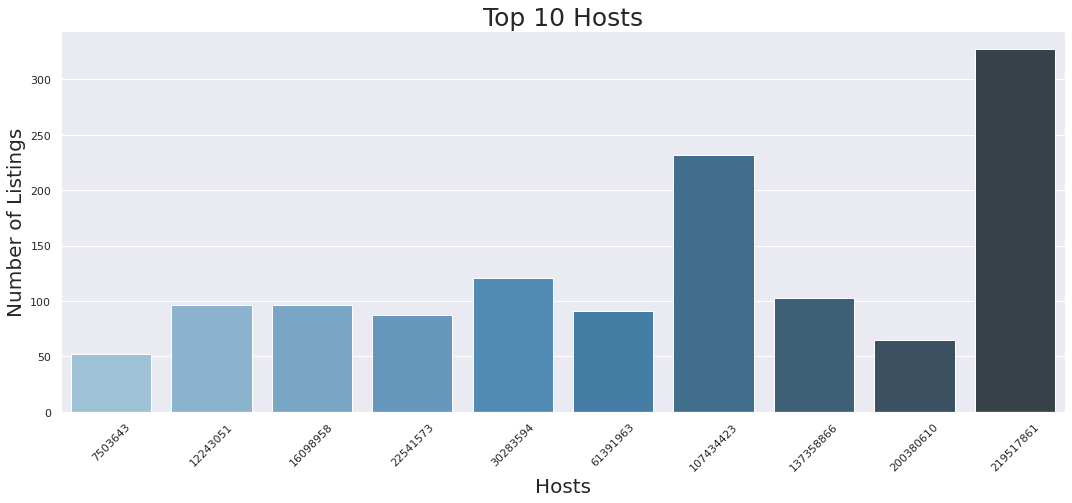

In [14]:
plt.figure(figsize=(18,7))
sns.barplot(top_host_id.index,top_host_id.values,palette='Blues_d')
plt.xticks(rotation=45)
plt.xlabel('Hosts',size =20)
plt.ylabel('Number of Listings',size =20)
plt.title('Top 10 Hosts',size =25)
plt.show()

From above barplot , we can see that 0.2 percent of unique hosts have 2.6 percent of total holdings in New York . In Layman terms , top 10 hosts have around 1270 listings. And , one of the hosts even has more than 320 listings, which is quite high. "Must be a hotel Monopoly or something ,Just Kidding" XD

## 3.2 Listings in Each Neighbourhood Group


Now we see the proportion of listings distributed among the neighbourhood groups using a pie chart. 

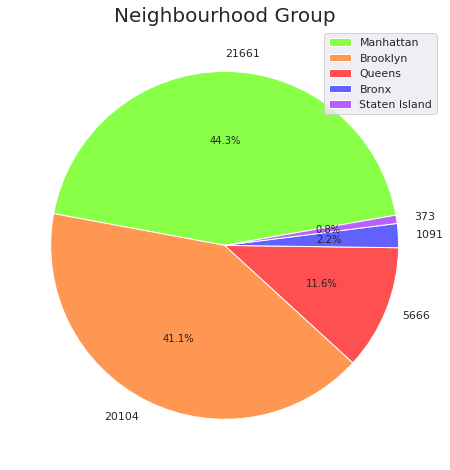

In [15]:
labels = airbnb.neighbourhood_group.value_counts().index
colors = ['#89FF48','#FF9753','#FE5050','#6061FE','#B960FE']
explode = (0.1,0.1,0.1,0.3,0.2)
shape = airbnb.neighbourhood_group.value_counts().values
plt.figure(figsize=(8,8))
plt.pie(shape , labels=shape, colors= colors, autopct = '%1.1f%%', startangle=10)
plt.legend(labels)
plt.title('Neighbourhood Group',size = 20 )
plt.show()

Ok ok ok ! , it seems more than 85 % listings are in Brooklyn and Manhatten alone , followed up by Queens with 11.66 % and Staten Island and Bronx have very less number in comparison.  

## 3.3 Top Planning Neighbourhoods
 Now we take top 10 neighbourhood with most listings and see what we get.

In [16]:
top_areas = pd.DataFrame(airbnb['neighbourhood'].value_counts().head(10))
top_areas

,neighbourhood
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564
Midtown,1545


Now, Lets add the neighbourhood group above areas correspondings to, and we might relate some info we have.

In [17]:
area_group =[]
for area in top_areas.index:
    area_group.append(airbnb[airbnb['neighbourhood']==area].head(1)['neighbourhood_group'].values[0])

top_areas['Group'] = area_group
top_areas.reset_index(inplace=True)
top_areas.columns = ['Neighbourhood','Listings','Group']
top_areas

,Neighbourhood,Listings,Group
0,Williamsburg,3920,Brooklyn
1,Bedford-Stuyvesant,3714,Brooklyn
2,Harlem,2658,Manhattan
3,Bushwick,2465,Brooklyn
4,Upper West Side,1971,Manhattan
5,Hell's Kitchen,1958,Manhattan
6,East Village,1853,Manhattan
7,Upper East Side,1798,Manhattan
8,Crown Heights,1564,Brooklyn
9,Midtown,1545,Manhattan


As Expected!!! The top 10 neighbourhood are from Either Manhatten or Broolyn which have almost 80 % listings of all new york . which we also within our expectations.

## 3.4 Map using Lat Long values

Apparantly , using the latitude and longitude values we can create a map which will in return should look like map of New York. Let's put an original map behind the plot to see the much better result.

But first, we need to check the values within the column

In [18]:
coords=airbnb[['neighbourhood_group','latitude','longitude']]
coords.describe()

,latitude,longitude
count,48895.000000,48895.000000
mean,40.728949,-73.952170
std,0.054530,0.046157
min,40.499790,-74.244420
25%,40.690100,-73.983070
50%,40.723070,-73.955680
75%,40.763115,-73.936275
max,40.913060,-73.712990


From the data above, we can see the outer values of longitude and latitude from the min and max index.

Next, we visualize the scatter plot map of every listing and group it by color on each different region

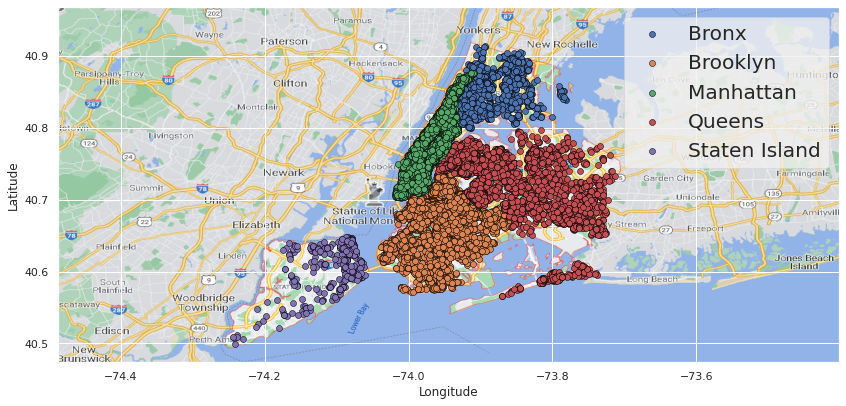

In [19]:
plt.figure(figsize=(14,7))
BBox = (-74.48746357761304,-73.4012759869841, 40.47380350214988,40.96843158118323)
sg_map = plt.imread('/content/drive/MyDrive/Colab Notebooks/Airbnb Data Analsis/nyc_map.PNG')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca()
plt.style.use('fivethirtyeight')
groups = airbnb.groupby('neighbourhood_group')
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=1, edgecolors='black')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(prop={"size":"x-large"})

Now we can see how the listings are plotted into a map. For a better understanding of the listings density, we can use the plotly heat map.

With the heat map we can see where are the listings number greater than the rest. 



In [20]:
fig = px.density_mapbox(coords, lat='latitude', lon='longitude', radius=1,
                        center=dict(lat=40.7, lon=-73.9665), zoom=9,
                        mapbox_style="stamen-terrain")
fig.show()

From the map above, we can see clearly where the densest listing is located, shown by the yellow color in regions of Manhatten and Brooklyn and some part of Queens. Staten Island and Bronx haverelatively less listings . 


## 3.5 Price Map 

Now lets plot the map where we can see the price is more than the other regions.

But first we will remove some outliers. We can see in the description of data above that we have some listings with price around 10,000 dollars which is very high from average so we will use quantile function to remove top 5 percent values and bottom 5 percent for better understanding of general price movement with the location.


In [21]:
airbnb_1 = airbnb[(airbnb.price < airbnb.price.quantile(0.95)) & (airbnb.price > airbnb.price.quantile(0.05))]

Next, we visualize the scatter plot map of every listing and the difference in price range using longitude and latitude points with a price heat map.

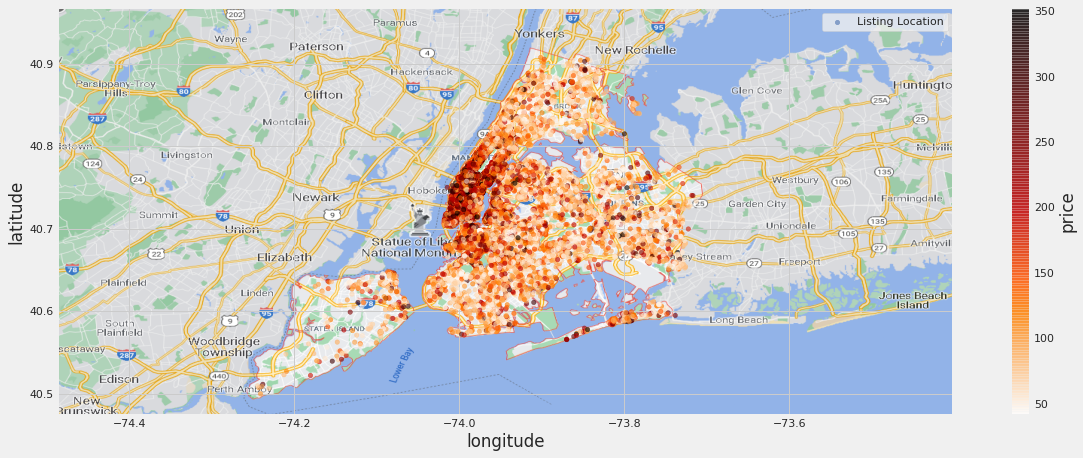

In [22]:
plt.figure(figsize=(18,7))
BBox = (-74.48746357761304,-73.4012759869841, 40.47380350214988,40.96843158118323)
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca()
airbnb_1.plot(kind='scatter',x='longitude',y='latitude',label='Listing Location', c='price', ax=ax, cmap=plt.get_cmap('gist_heat_r'), colorbar=True, alpha=0.6, zorder=5)
plt.legend()
plt.show()

We can see that Manhatten and Northern part of Brooklyn have much higher average price than the rest. And the price starts to get low when move further from the position. This maybe because of the Sea side ,connectivity of Manhatten Bridge and The Central Park location in Manhatten which is a good tourist spot.

According to metro-manhatten.com the higher price in Manhatten and some parts of Brooklyn is because of the following reasons:

* **A limited amount of space**: People are buying air rights because of less constuction space in New York resulting in High Rise Buildings

* **Strict zoning laws** : They have to follow strict rules related to height, floor-to-area ratio, setbacks, parking, and so on, and these rules can differ from borough to borough or from zoning district to zoning district.

* **Intense competition** : Because vacant land is scarce in Manhatten City, the competition for potential development sites is brutal. The demand for available land suitable for commercial or residential development often surpasses the supply, causing prices to go up.

* **High Construction Cost** : According to a 2019 report by the New York Building Congress, NYC boasts the highest construction costs in the entire U.S. What’s more, for Class A office construction, prices here are 15% to 50% higher than in other major U.S. cities, and as much as $300 higher per square foot than cities in Asia and the Middle East. This makes NYC the most expensive market in the world when it comes to office construction costs.



*By looking at two maps above, we could argue that the Airbnb listing price is related to the real estate market segments. But to conclude that, we need more data to do further analysis.*

## 3.6 Price Distribution Box Plots 

Based on our price heat map observation, we need to visualize the price distribution using a box plot to understand more on the listing price range grouped by the ‘neighbourhood_group’ /region area.



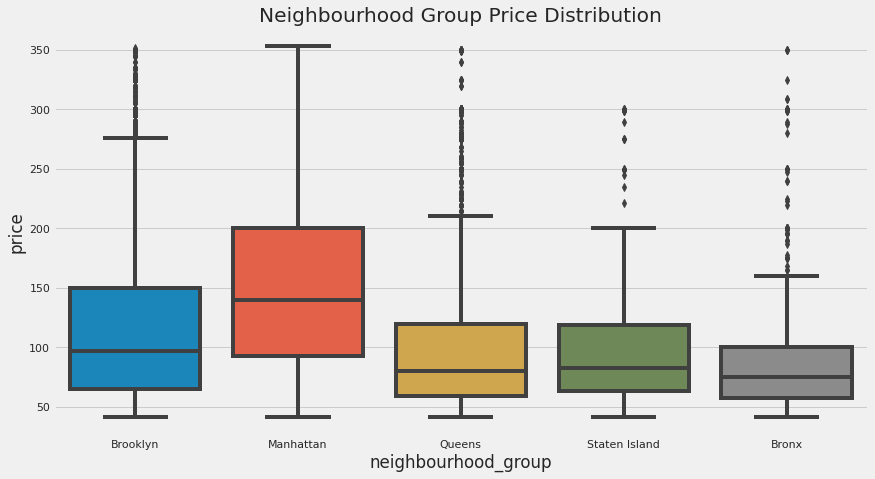

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.boxplot(y='price',x='neighbourhood_group',data = airbnb_1)
plt.title('Neighbourhood Group Price Distribution')
plt.show()

From the data above, we see the Manhatten has the most expensive price per night with a median of around  $145.

## Top Listing Words
Next, we will explore deeper on the property detail by finding out what the most used word in the listing name. The most used word could represent the selling value of their property for the prospective guests. 

In [24]:
words = ''
for i in airbnb['name'].dropna():
    words = words +i.lower().strip() 
    
words_list = words.split()


Now, lets find out the top 25 words with more than length 3 and excluding the stop words such as 'with','from','about','the','for','and' etc.

In [25]:
top_25 = pd.Series(list(filter(lambda a: len(a) >= 3 and a not in ['with','from','about','the','for','and'] , words_list))).value_counts().head(25)

Now Let's visualize the findings with a bar plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



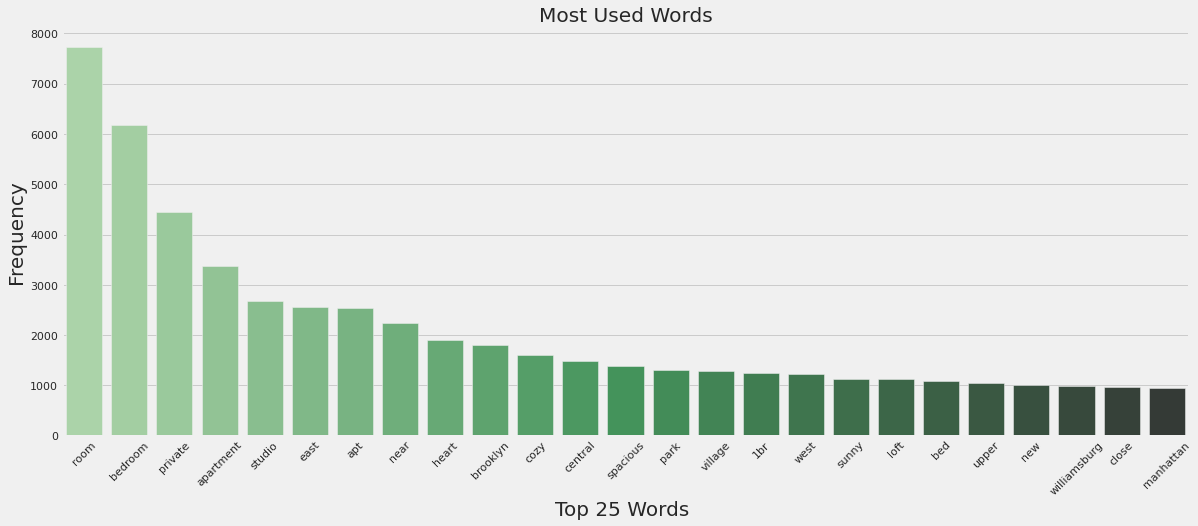

In [26]:
plt.figure(figsize=(18,7))
sns.barplot(top_25.index,top_25.values,palette='Greens_d')
plt.xticks(rotation=45)
plt.xlabel('Top 25 Words ',size =20)
plt.ylabel('Frequency',size =20)
plt.title('Most Used Words')
plt.show()

From the chart above, we see the top 25 words used in the listing name. We can use the word cloud visualization method to help us better understand the chart.

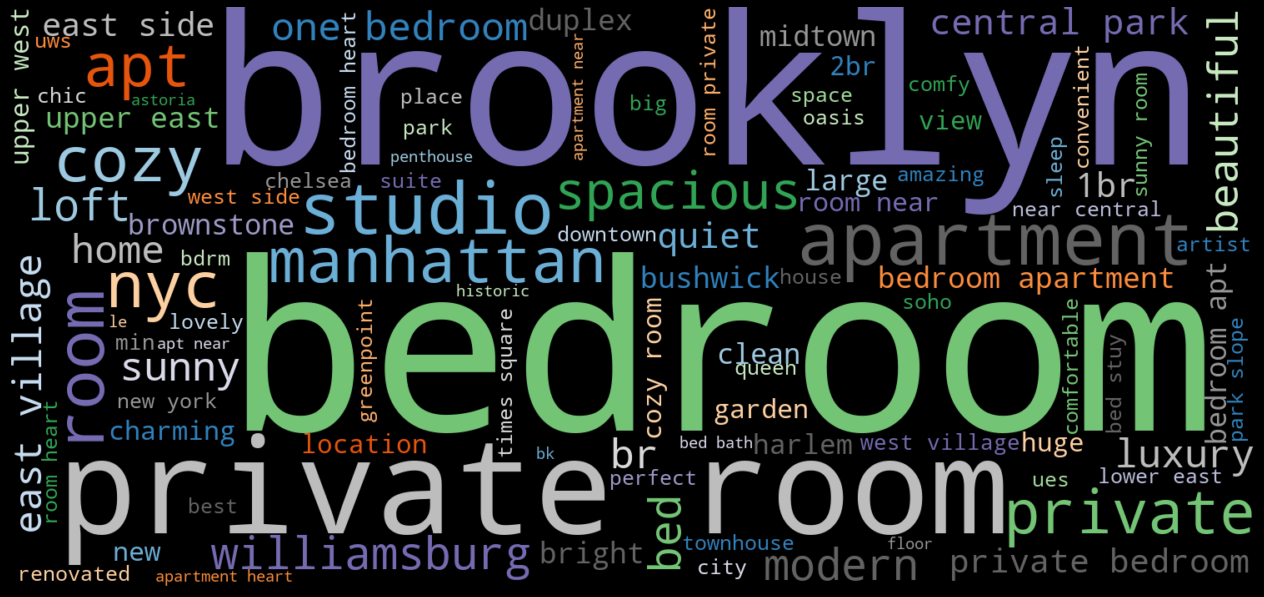

In [27]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=1500, height=700,max_words=100, background_color = 'black',colormap='tab20c').generate(words)
plt.figure(figsize=(20,10),facecolor = 'black')
#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

As we can see, most of the listing selling values are related to the proximity or connection to location and center of activities, shown by 'west side, ‘near’, ‘to’, ‘city’ ,'williamsburg' , 'brooklyn', ‘walk to’ , 'central park'  keyword. Interesting to see how the room condition falls behind those values, shown by the ‘spacious’, ‘cosy’, ’cozy’ on the lower rank of the chart.

## 3.7 Room type details Donut Charts

Next, we will visualize all listing’s room type proportions from each region area . Let's see what we can get. 

In [30]:
airbnb_types=airbnb.groupby(['neighbourhood_group', 'room_type']).count().reset_index()
airbnb_types = airbnb_types[['neighbourhood_group','room_type','name']]
airbnb_types.columns=['neighbourhood_group','room_type','count']

In [32]:
df2_room_types=airbnb_types.pivot(index='neighbourhood_group', columns='room_type', values='count')
df2_room_types

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,59
Brooklyn,9558,10127,413
Manhattan,13193,7979,480
Queens,2096,3372,198
Staten Island,176,188,9


First lets see what are the numbers loking on a bar chart for each neighbourhood group

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

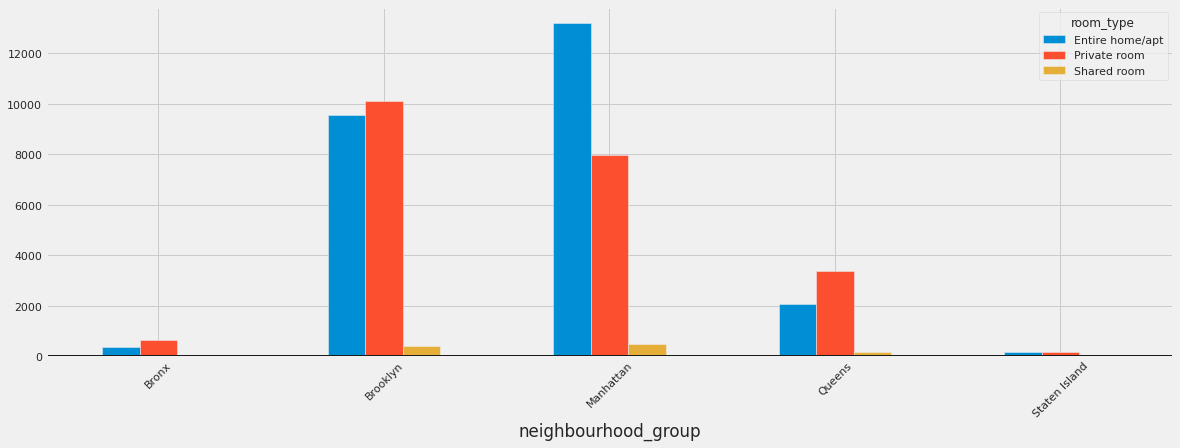

In [37]:
df2_room_types.plot(kind='bar',figsize=(18,6))
plt.axhline(0, color='k')
plt.xticks(rotation=45)

To know the percentage of room type in each neighbourhood , now we will use donut charts for better understanding. We will create a function to make a donut chart for one of the neighbourhood group and pass on all the neighbourhood to get all donut chart for each neighbourhood group.

In [40]:
def create_donuts(data):
    color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#21908d', 'Hotel room' : '#C0C0C0' }
    for i in data['neighbourhood_group'].unique():
        df= airbnb_types[airbnb_types['neighbourhood_group']==i].copy()
        fig = px.pie(df, values='count', names='room_type',width=600, height=250,
             title=i,
             hover_data=['count'],hole=0.6,labels={'room_type':'Room Type'})
        fig.update_traces(textposition='outside', textinfo='percent+label',marker=dict(colors=colors))
        fig.show()

In [41]:
create_donuts(airbnb_types)

We can see the Manhatten is the only region that dominated by the entire home/apt type, with the rest of the region is dominated by private room type. Overall, the hotel type is the least listing on each region, since Airbnb has only been accepting hotel listing on 2018.
